In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import xAPIConnector
from dotenv import load_dotenv
import os
import time
import json

In [21]:
stocks = pd.read_csv("calculated.csv", index_col=0)
print(f"Before: {stocks.shape}")
stocks = stocks[stocks["return"] > 0.04]
print(f"After: {stocks.shape}")

stocks.to_csv("49best.csv")

Before: (454, 2)
After: (49, 2)


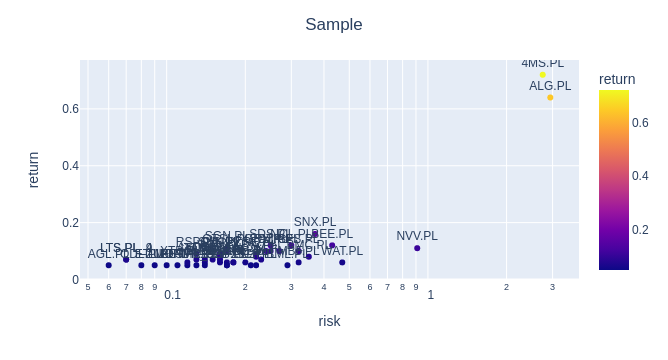

In [22]:
fig = px.scatter(stocks, x="risk", y="return", text=stocks.index.values, log_x=True, size_max=100, color="return")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Sample', title_x=0.5)
fig.show()

In [23]:
def get_price(instrument: str):
    payload = {"period": 43200, "start": 1640998800000,
               "symbol": instrument}
    load_dotenv()
    userId = os.environ.get("LOGIN")
    password = os.environ.get("PASSWORD")
    client = xAPIConnector.APIClient()
    login_response = client.execute(xAPIConnector.loginCommand(userId=userId, password=password))
    ssid = login_response['streamSessionId']
    resp = client.commandExecute('getChartLastRequest', dict(info=payload))
    client.disconnect()
    return resp

def stock_calc(data):
    price = []
    for idx in range(len(data)-1):
        tmp = ((data[idx+1]["open"]+data[idx+1]["close"]) - (data[idx]["open"]+data[idx]["close"])) / (data[idx]["open"]+data[idx]["close"])
        price.append(tmp)
    price = np.array(price)
    return np.mean(price).__round__(2), np.std(price).__round__(2)

def parser(name: str):
    stock_data = get_price(name)
    return stock_calc(stock_data["returnData"]["rateInfos"])

def price_list(name: str):
    stock_data = get_price(name)
    prices = []
    for x in stock_data["returnData"]["rateInfos"]:
        prices.append(x["open"]+x["close"])
    return prices


In [37]:
sp_50_dict = {}
sp_50_cov = np.zeros((stocks.shape[0], stocks.shape[0]))
names = stocks.index.values
banned = []

In [39]:
from IPython.display import clear_output
# build covariance matrix
def calculate_increases(name):
    # Endings = prices.Close
    prices = price_list(name)
    increases = []
    for i in range(len(prices) - 1):
        increase = (prices[i+1] - prices[i])/prices[i]
        increases.append(increase)
    # increases_ = np.array(increases)
    if len(increases) != 17:
        print(f"{name}: {len(increases)}")
        banned.append(name)
    return increases

for name in names:
    sp_50_dict[name] = calculate_increases(name)

In [42]:
print(banned)
print(f"Pre: {stocks.shape}")
stocks = stocks.drop(banned)
print(f"After: {stocks.shape}")

[]
Pre: (43, 2)
After: (43, 2)


In [44]:
names = stocks.index.values

In [46]:
from IPython.display import clear_output
# build covariance matrix
banned = []
def calculate_increases(name):
    # Endings = prices.Close
    prices = price_list(name)
    increases = []
    for i in range(len(prices) - 1):
        increase = (prices[i+1] - prices[i])/prices[i]
        increases.append(increase)
    # increases_ = np.array(increases)
    if len(increases) != 17:
        print(f"{name}: {len(increases)}")
        banned.append(name)
    return increases

for name in names:
    sp_50_dict[name] = calculate_increases(name)

for i in range(stocks.shape[0]):
    for j in range(stocks.shape[0]):
        cov = np.cov(sp_50_dict[names[i]], sp_50_dict[names[j]])[0][1]
        sp_50_cov[i, j] = cov

In [48]:
pd.DataFrame(sp_50_cov).to_csv('43StocksCovariance.csv')
sp_50_cov

array([[ 1.44388737e-02,  5.62215078e-03,  3.24097024e-03, ...,
         2.60291556e-03,  4.42133204e-03, -1.72613892e-02],
       [ 5.62215078e-03,  1.68899056e-02, -1.91297347e-03, ...,
        -3.46785554e-04,  7.19641283e-03, -1.21352843e-02],
       [ 3.24097024e-03, -1.91297347e-03,  8.92740396e-03, ...,
         7.09850068e-03,  4.82679960e-03, -5.79308935e-03],
       ...,
       [ 2.60291556e-03, -3.46785554e-04,  7.09850068e-03, ...,
         3.19940994e-02,  9.66280112e-03,  2.80414639e-05],
       [ 4.42133204e-03,  7.19641283e-03,  4.82679960e-03, ...,
         9.66280112e-03,  2.34179312e-02,  2.65457819e-03],
       [-1.72613892e-02, -1.21352843e-02, -5.79308935e-03, ...,
         2.80414639e-05,  2.65457819e-03,  1.40688379e-01]])

In [63]:
best_43 = pd.read_csv("49best.csv", index_col=0)
print(f"After: {best_43.shape}")
print(stocks.index.values)
print(best_43.index.values)

After: (49, 2)
['BFT.PL_9' 'ATA.PL' 'ZUE.PL' 'LBW.PL' 'SFS.PL' 'VOT.PL' 'PDZ.PL' 'CLD.PL'
 'KOM.PL' 'BMC.PL' 'MBF.PL' 'GRX.PL' 'WTN.PL' 'RSP.PL' 'MON.PL' 'BML.PL'
 'ALG.PL' 'ELT.PL' 'ZEP.PL' 'ATR.PL' 'ODL.PL' 'ETL.PL' 'NVV.PL' '4MS.PL'
 'CIG.PL' 'ATC.PL' 'COG.PL' 'XTP.PL' 'SUN.PL' 'XTB.PL_9' 'ASB.PL' 'WAT.PL'
 'OTSL.PL' 'SGN.PL' 'MRB.PL' 'SCP.PL' 'GOP.PL' 'BRS.PL_9' 'SPR.PL'
 'ZRE.PL' 'BRS.PL_4' 'UNT.PL' 'SNX.PL']
['BFT.PL_9' 'ATA.PL' 'ZUE.PL' 'BEE.PL' 'LBW.PL' 'SFS.PL' 'VOT.PL' 'PDZ.PL'
 'CLD.PL' 'KOM.PL' 'BMC.PL' 'MBF.PL' 'GRX.PL' 'WTN.PL' 'RSP.PL' 'MON.PL'
 'BML.PL' 'ALG.PL' 'ELT.PL' 'LTS.PL_9' 'LTS.PL_4' 'ZEP.PL' 'ATR.PL'
 'ODL.PL' 'ETL.PL' 'NVV.PL' '4MS.PL' 'CIG.PL' 'NCL.PL' 'ATC.PL' 'SDS.PL'
 'COG.PL' 'XTP.PL' 'SUN.PL' 'XTB.PL_9' 'ASB.PL' 'WAT.PL' 'OTSL.PL'
 'SGN.PL' 'MRB.PL' 'SCP.PL' 'GOP.PL' 'BRS.PL_9' 'SPR.PL' 'ZRE.PL'
 'BRS.PL_4' 'AGL.PL' 'UNT.PL' 'SNX.PL']


In [65]:
best_43 = best_43[best_43.index.isin(list(stocks.index.values))]
print(f"After: {best_43.shape}")
best_43.to_csv("43best.csv")

After: (43, 2)
